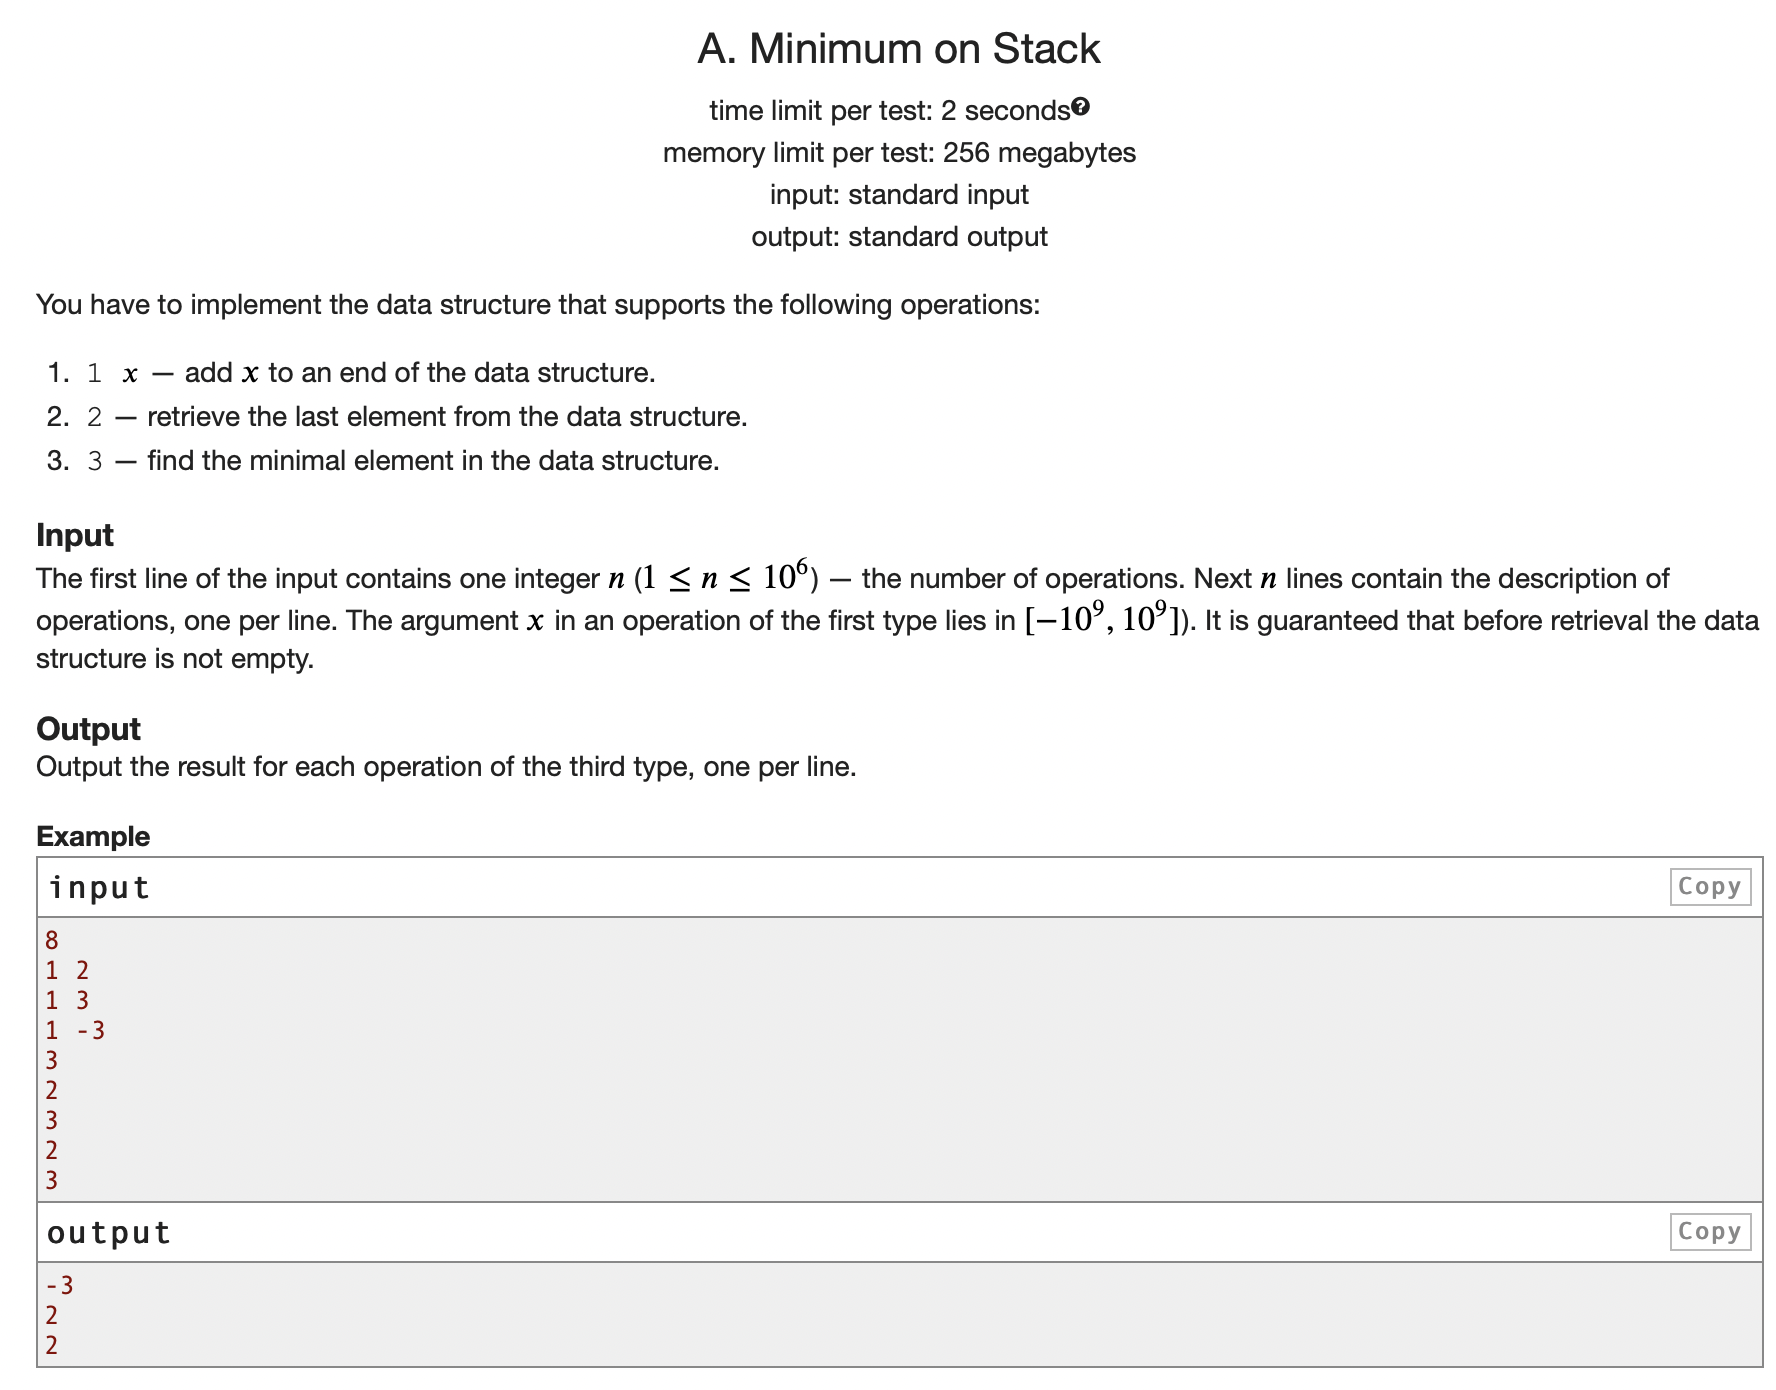

In [ ]:
class Node:
    def __init__(self, val, curr_min, next_node=None):
        self.val = val
        self.min = curr_min
        self.next = next_node


class LinkedList:
    def __init__(self, head=None):
        self.head = head

    def push(self, elem):
        new_min = min(elem, self.head.min) if self.head else elem
        new_node = Node(elem, new_min, self.head)
        self.head = new_node

    def pop(self):
        if self.head:
            self.head = self.head.next

    def get_min(self):
        if self.head:
            return self.head.min
        return None


class Stack(LinkedList):
    def __call__(self, operation, *args):
        if operation == 1:
            super().push(args[0])
        elif operation == 2:
            super().pop()
        else:
            print(super().get_min())


n = int(input())
stack = Stack()
for _ in range(n):
    call_args = list(map(int, input().split()))
    stack(*call_args)

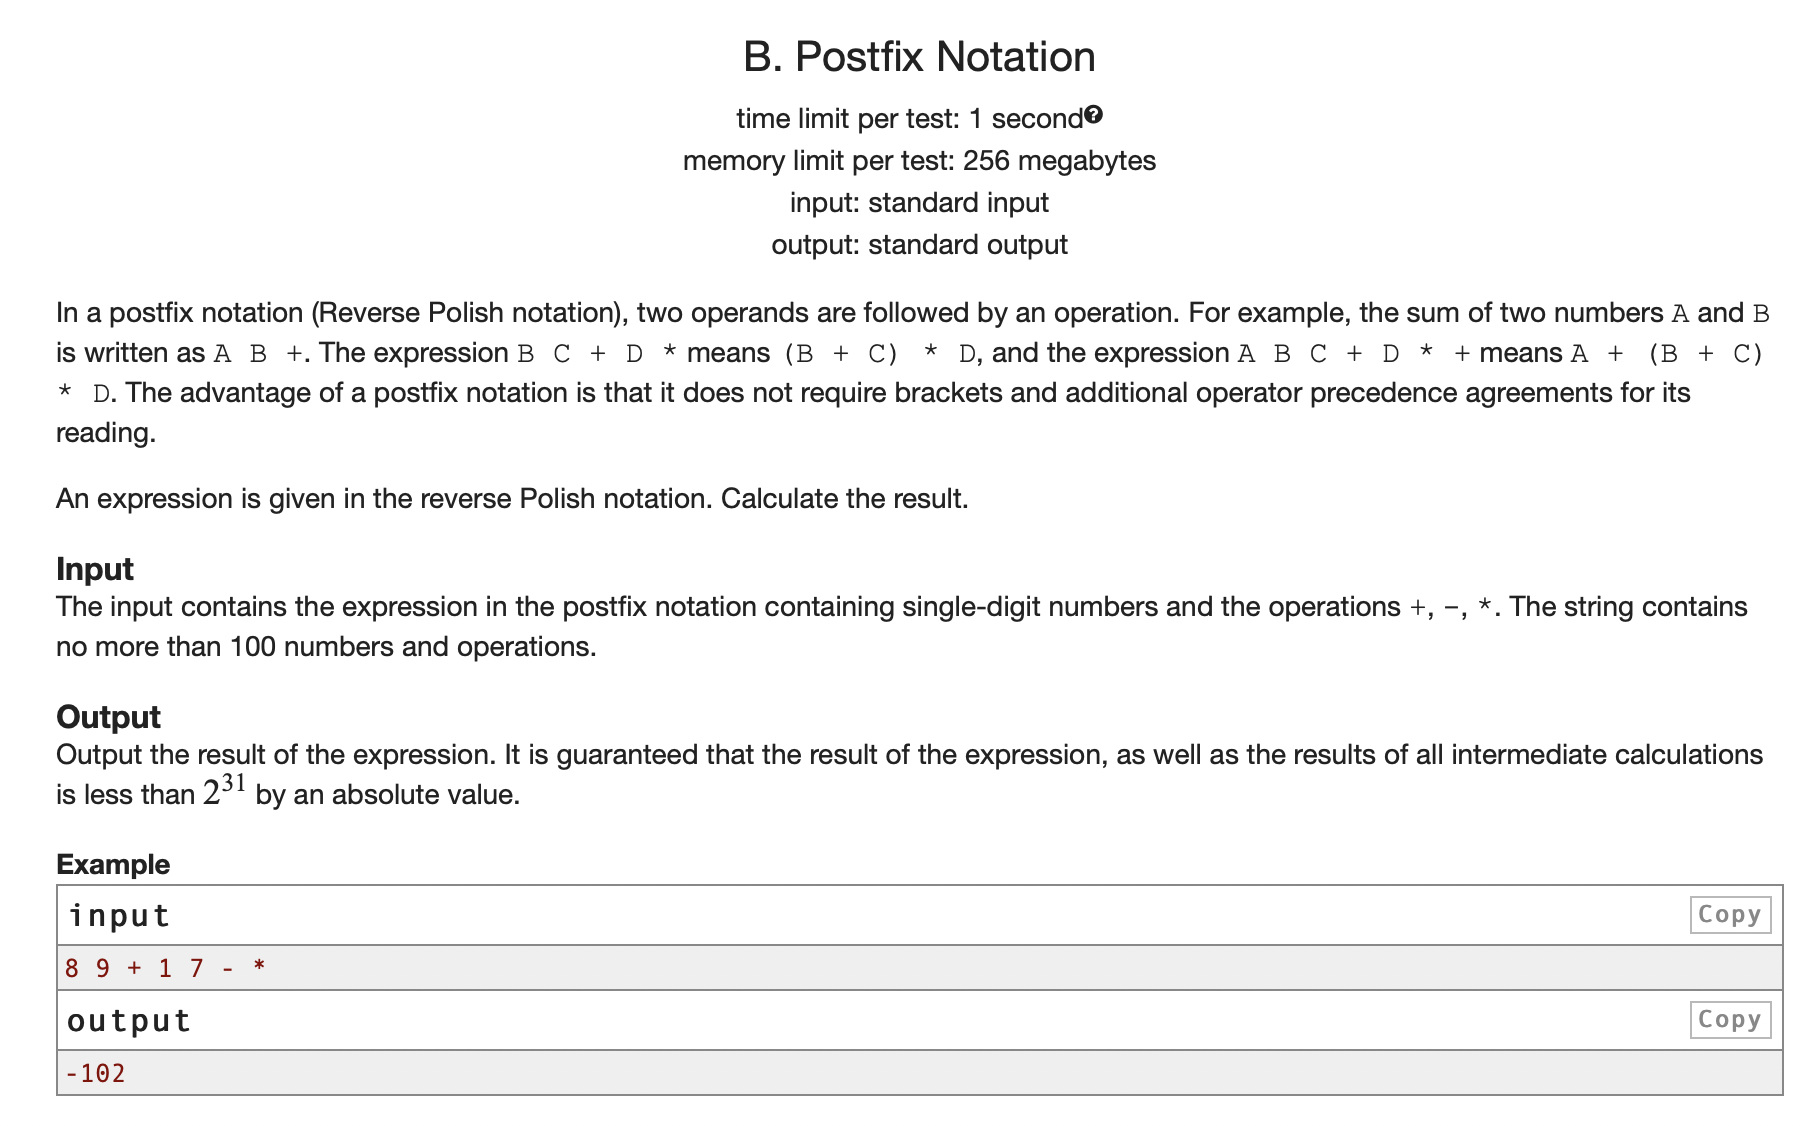

In [ ]:
class DynamicArray:
    CHANGE_FACTOR = 2
    DECREASE_FACTOR = 4

    def __init__(self, init_capacity=4):
        self.init_capacity = init_capacity
        self.capacity = self.init_capacity
        self.size = 0
        self.array = [0] * self.init_capacity

    def push(self, elem):
        if self.size + 1 > self.capacity:
            self._increase_capacity()
        self.array[self.size] = elem
        self.size += 1

    def pop(self):
        self.size -= 1
        last_elem = self.array[self.size]
        if (self.capacity > self.init_capacity and
                self.capacity > self.size * DynamicArray.DECREASE_FACTOR):
            self._decrease_capacity()
        return last_elem

    def _increase_capacity(self):
        new_capacity = self.capacity * DynamicArray.CHANGE_FACTOR
        self._change_capacity(new_capacity)

    def _decrease_capacity(self):
        new_capacity = self.capacity // DynamicArray.CHANGE_FACTOR
        self._change_capacity(new_capacity)

    def _change_capacity(self, capacity):
        self.capacity = capacity
        new_array = [0] * self.capacity
        for i in range(self.size):
            new_array[i] = self.array[i]
        self.array = new_array


def solve(expression):
    stack = DynamicArray()
    for symbol in expression.split():
        if symbol not in '+-*':
            stack.push(int(symbol))
        else:
            right = stack.pop()
            left = stack.pop()
            if symbol == '+':
                stack.push(left + right)
            elif symbol == '-':
                stack.push(left - right)
            else:
                stack.push(left * right)
    return stack.pop()


print(solve(input()))

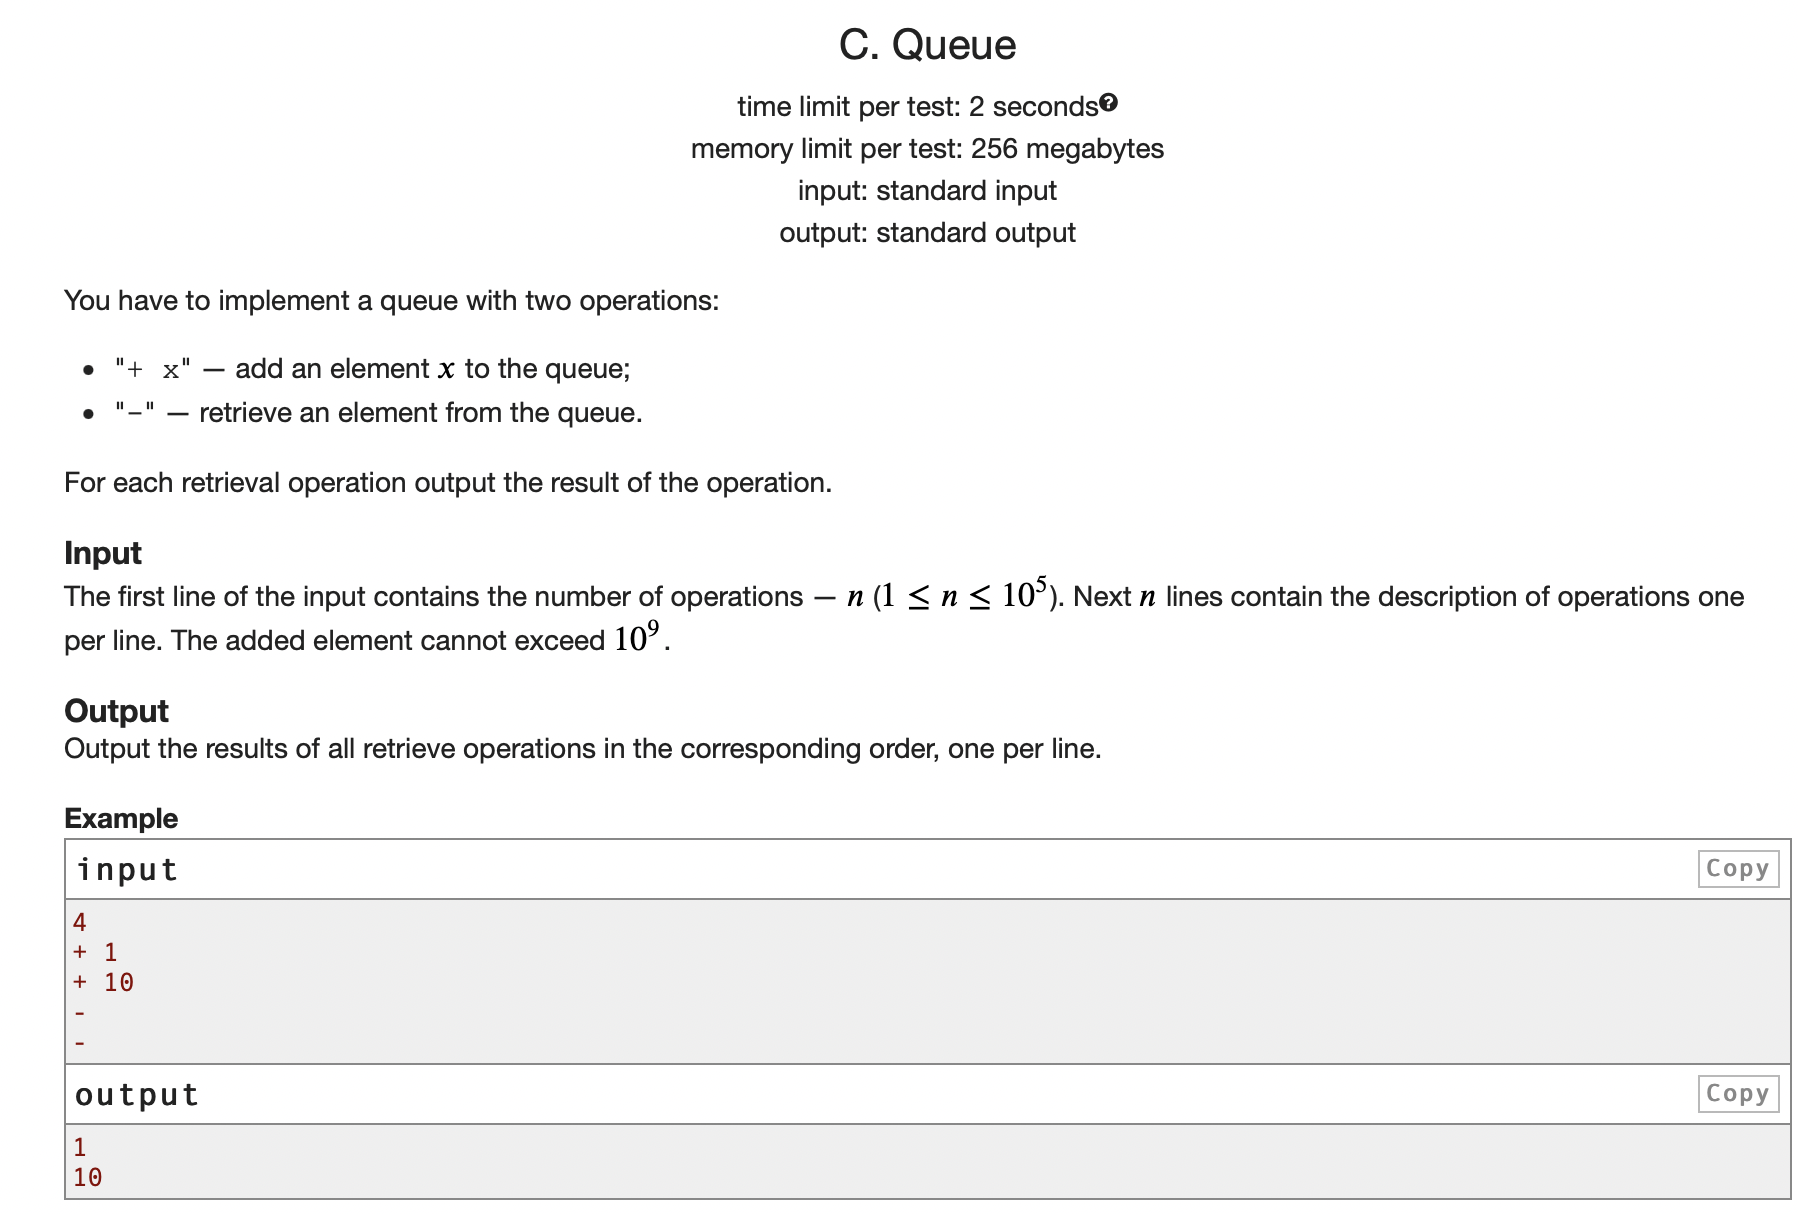

In [ ]:
from itertools import chain


class DynamicСyclicArray:
    CHANGE_FACTOR = 2
    DECREASE_FACTOR = 4

    def __init__(self, init_capacity=4):
        self.init_capacity = init_capacity
        self.capacity = self.init_capacity
        self.head = 0
        self.tail = 0
        self.array = [0] * self.init_capacity

    def push(self, elem):
        if self._get_size() + 2 > self.capacity:
            self._increase_capacity()
        self.array[self.tail] = elem
        self.tail = self._next(self.tail)

    def pop(self):
        first_elem = self.array[self.head]
        self.head = self._next(self.head)
        if (self.capacity > self.init_capacity and
                self.capacity > self._get_size() * DynamicСyclicArray.DECREASE_FACTOR):
            self._decrease_capacity()
        return first_elem

    def _get_size(self):
        if self.tail >= self.head:
            return self.tail - self.head
        return self.capacity - self.head + self.tail

    def _next(self, i):
        return (i + 1) % self.capacity

    def _increase_capacity(self):
        new_capacity = self.capacity * DynamicСyclicArray.CHANGE_FACTOR
        self._change_capacity(new_capacity)

    def _decrease_capacity(self):
        new_capacity = self.capacity // DynamicСyclicArray.CHANGE_FACTOR
        self._change_capacity(new_capacity)

    def _change_capacity(self, capacity):
        new_array = self._get_new_array(capacity)
        self.tail = self._get_size()
        self.head = 0
        self.array = new_array
        self.capacity = capacity

    def _get_new_array(self, new_capacity):
        new_array = [0] * new_capacity
        if self.tail > self.head:
            for new, old in enumerate(range(self.head, self.tail)):
                new_array[new] = self.array[old]
        else:
            for new, old in enumerate(chain(range(self.head, self.capacity),
                                            range(self.tail))):
                new_array[new] = self.array[old]
        return new_array


class Queue(DynamicСyclicArray):
    def __call__(self, operation, *args):
        if operation == '+':
            super().push(args[0])
        else:
            print(super().pop())


n = int(input())
queue = Queue()
for _ in range(n):
    call_args = list(input().split())
    queue(*call_args)

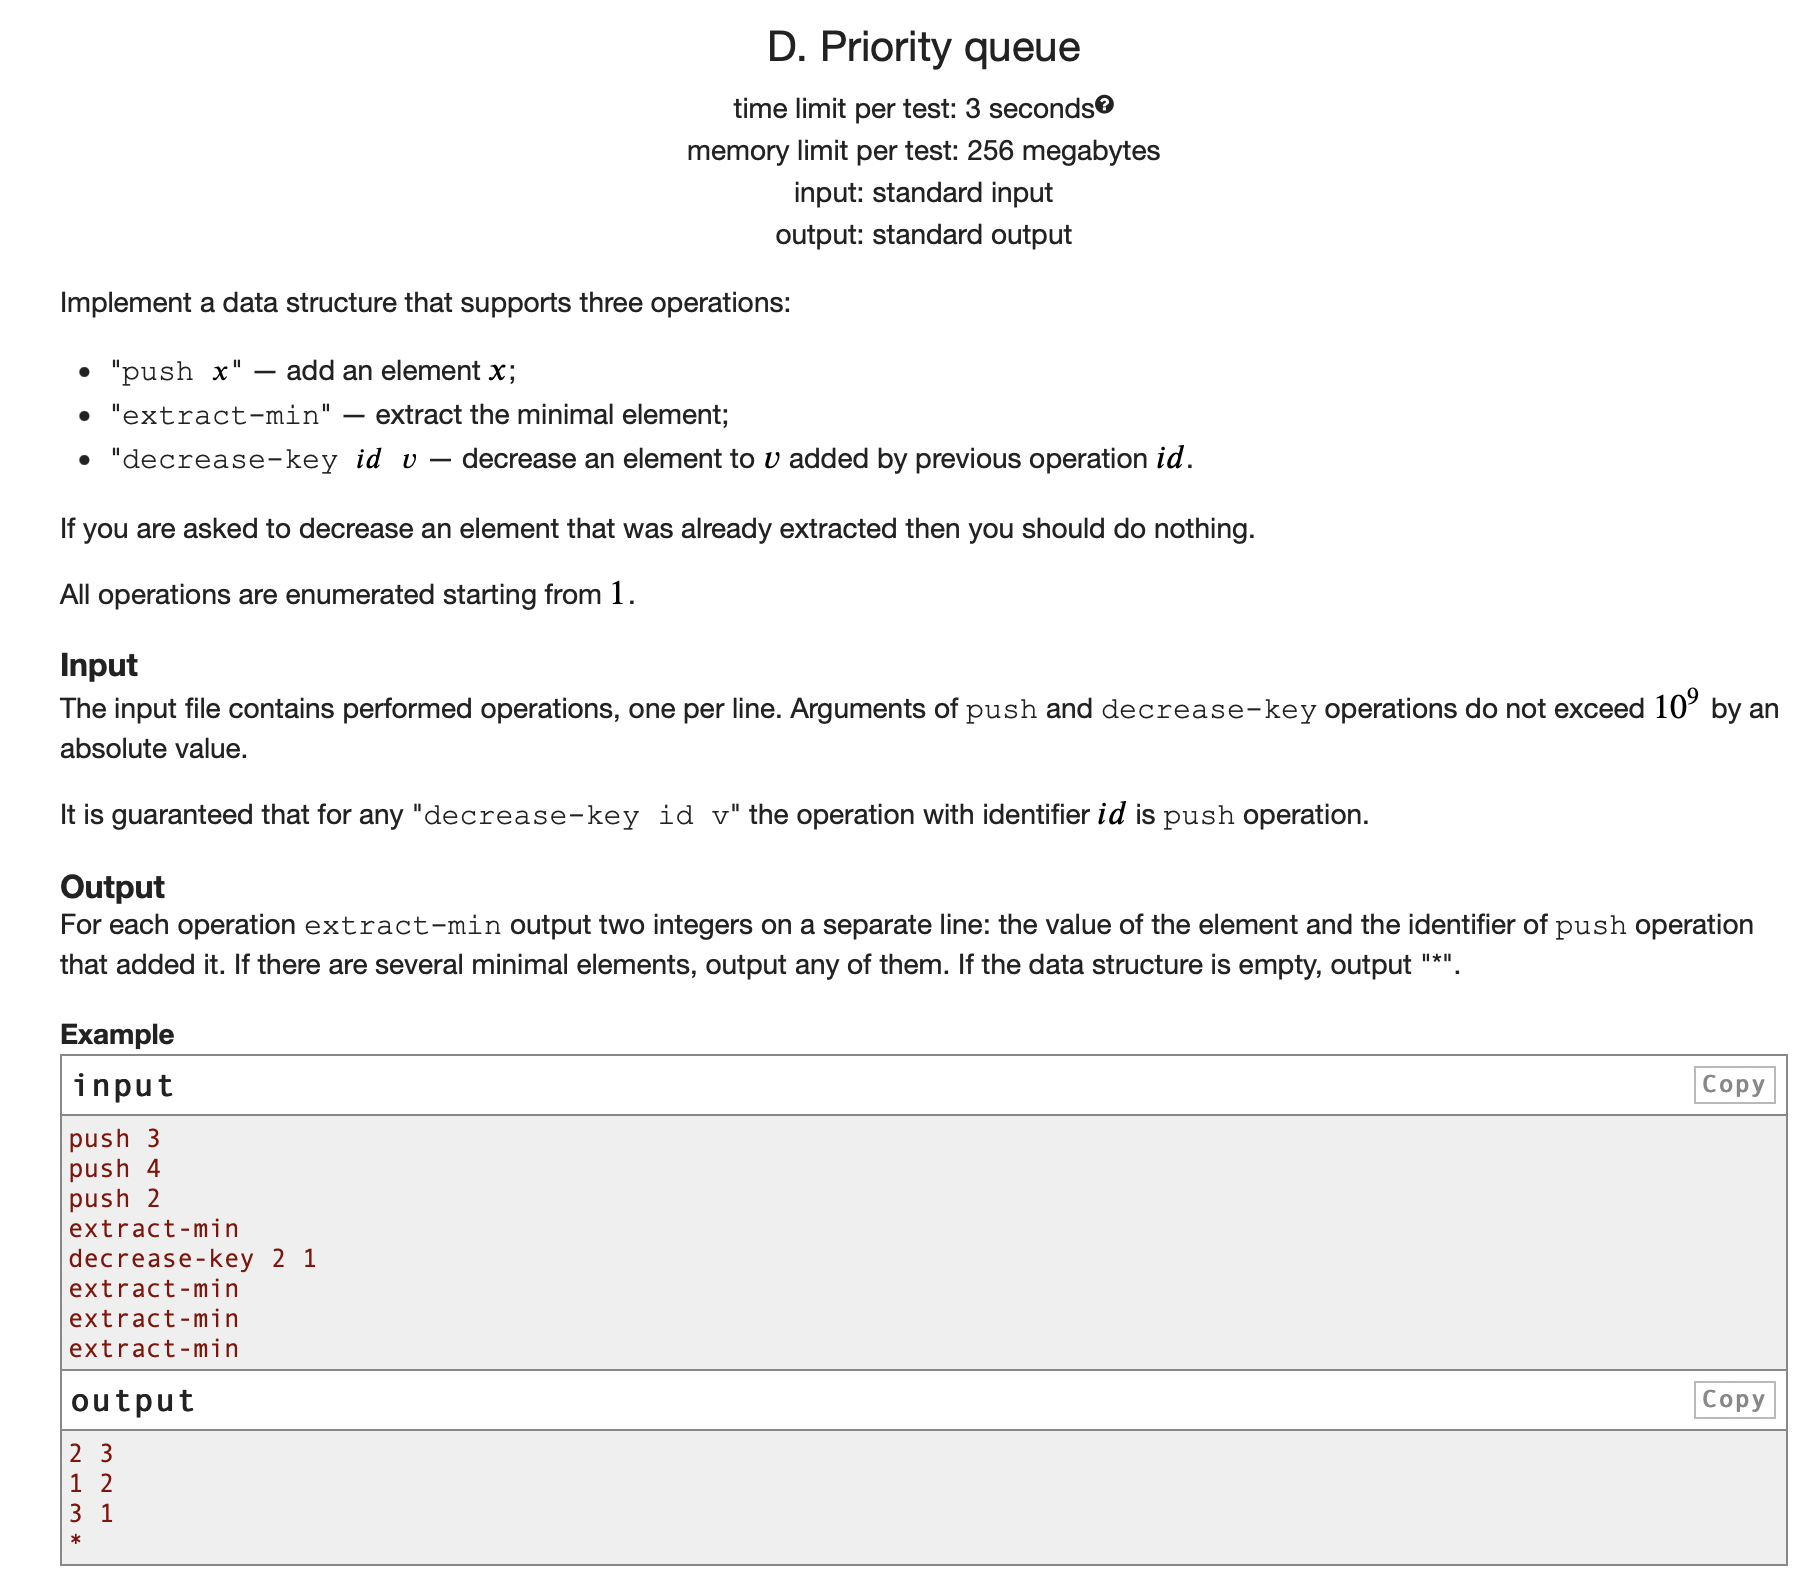

In [48]:
import sys


class Element:
    def __init__(self, operation_order, value):
        self._operation_order = operation_order
        self.value = value
        self.ind = None
        self.is_deleted = False

    def __lt__(self, other):
        return self.value < other.value

    def __str__(self):
        return f'{self.value} {self._operation_order}'


class MinHeap:
    def __init__(self):
        self.heap_list = []
        self.heap_size = 0

    def insert(self, elem):
        self.heap_list.append(elem)
        elem.ind = self.heap_size
        self.sift_up(self.heap_size)
        self.heap_size += 1

    def remove_min(self):
        if self.heap_size:
            self._swap(0, self.heap_size - 1)
            min_elem = self.heap_list.pop()
            min_elem.is_deleted = True
            self.heap_size -= 1
            self.sift_down()
            return min_elem
        return None

    def sift_up(self, ind):
        while ind > 0:
            parent = self._get_parent(ind)
            if self.heap_list[ind] < self.heap_list[parent]:
                self._swap(ind, parent)
                ind = parent
            else:
                break

    def sift_down(self):
        i = 0
        while self._get_left_child(i) < self.heap_size:
            min_child = self._get_min_child(i)
            if self.heap_list[min_child] < self.heap_list[i]:
                self._swap(min_child, i)
                i = min_child
            else:
                break

    def _swap(self, i, j):
        self.heap_list[i].ind, self.heap_list[j].ind = (self.heap_list[j].ind,
                                                        self.heap_list[i].ind)
        self.heap_list[i], self.heap_list[j] = (self.heap_list[j],
                                                self.heap_list[i])

    def _get_min_child(self, ind):
        left = self._get_left_child(ind)
        right = left + 1
        if (right < self.heap_size and
                self.heap_list[right] < self.heap_list[left]):
            return right
        return left

    @staticmethod
    def _get_parent(ind):
        return (ind - 1) // 2

    @staticmethod
    def _get_left_child(ind):
        return 2 * ind + 1


class PriorityQueue(MinHeap):
    def __init__(self):
        super().__init__()
        self.operation_number = 1
        self.operations_history = {}

    def __call__(self, operation, *args):
        if operation == 'push':
            element = Element(self.operation_number, int(args[0]))
            self.operations_history[self.operation_number] = element
            super().insert(element)
        elif operation == 'extract-min':
            curr_min = super().remove_min()
            if curr_min is None:
                print('*')
            else:
                print(curr_min)
        else:
            self._update(self.operations_history[int(args[0])], int(args[1]))
        self.operation_number += 1

    def _update(self, old_elem, new_value):
        if not old_elem.is_deleted:
            old_elem.value = new_value
            super().sift_up(old_elem.ind)


priority_queue = PriorityQueue()
for line in sys.stdin:
    call_args = list(line.split())
    priority_queue(*call_args)